# **🔦 Data Exploration**

---

## 📥 Imports

In [1]:
# Data
import pandas as pd 
import numpy as np 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Misc
import warnings

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

## 🎨 Styling

In [3]:
blue = '#146EF5'
red = '#ED3767'
amber = '#F5B14C'
mint = '#17BED1'
purple = '#815ADB'
pink = '#FF8FB8'

text_darker = '#7a8493'
text = '#a0a9b6'
background = '#f9fafc'

# Qualitative colormap
palette = [blue, red, amber, mint, purple, pink]

In [4]:
params = {
    'figure.figsize': (9, 6), 
    'figure.dpi': 150,
    'figure.facecolor': background,
    
    'axes.facecolor': background,
    'axes.edgecolor': text, 
    'axes.labelcolor': text,
    'axes.titlecolor': text_darker,
    'text.color': text, 
    'xtick.color': text, 
    'ytick.color': text,
    
    'font.size': 16, 
    'axes.titlesize': 16,    
    'axes.labelsize': 12,
    'xtick.labelsize': 12, 
    'ytick.labelsize': 12,
    
    'axes.spines.right': False, 
    'axes.spines.top': False
}

sns.set(context='notebook', style='white', palette=palette, rc=params)

## 👀 Data Preparation

In [5]:
df_demand = pd.read_csv("../data/raw/demanda.csv")
df_demand_test = pd.read_csv("../data/raw/demanda_test.csv")

df_products = pd.read_csv("../data/raw/catalogo_productos.csv")

### 🪙 Demand

In [6]:
df_demand.head()

,date,id_producto,demanda
0,2020-01-01,3,869
1,2020-01-01,4,407
2,2020-01-01,5,182
3,2020-01-01,6,91
4,2020-01-01,7,520


In [7]:
# Transform date to timestamp
df_demand["date"] = pd.to_datetime(df_demand["date"])

# Transform id_producto to string
df_demand["id_producto"] = df_demand["id_producto"].astype(str)

In [8]:
df_demand.describe(include='all')

,date,id_producto,demanda
count,126460,126460,126460.00
unique,NaN,135,NaN
top,NaN,60,NaN
freq,NaN,1028,NaN
mean,2021-06-15 21:19:40.262533120,NaN,318.93
min,2020-01-01 00:00:00,NaN,3.00
25%,2020-09-26 00:00:00,NaN,169.00
50%,2021-06-16 00:00:00,NaN,290.00
75%,2022-03-06 00:00:00,NaN,435.00
max,2022-11-30 00:00:00,NaN,1670.00


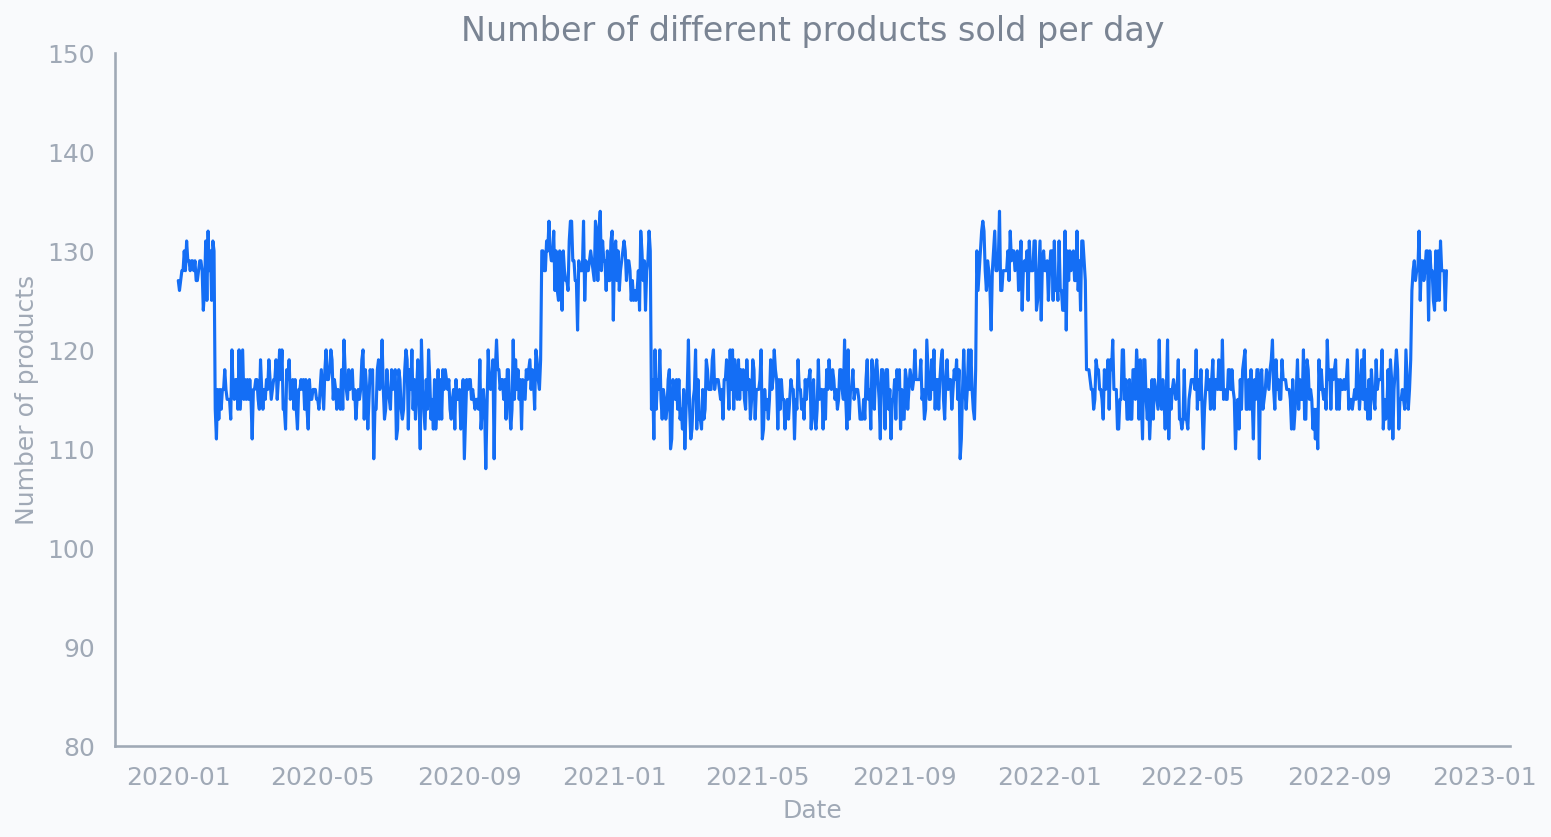

In [9]:
products_per_day = df_demand.groupby("date")['id_producto'].nunique().to_frame().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=products_per_day, x="date", y="id_producto", color=blue)
plt.title("Number of different products sold per day")
plt.xlabel("Date")
plt.ylabel("Number of products")
plt.ylim(80, 150)
plt.show()

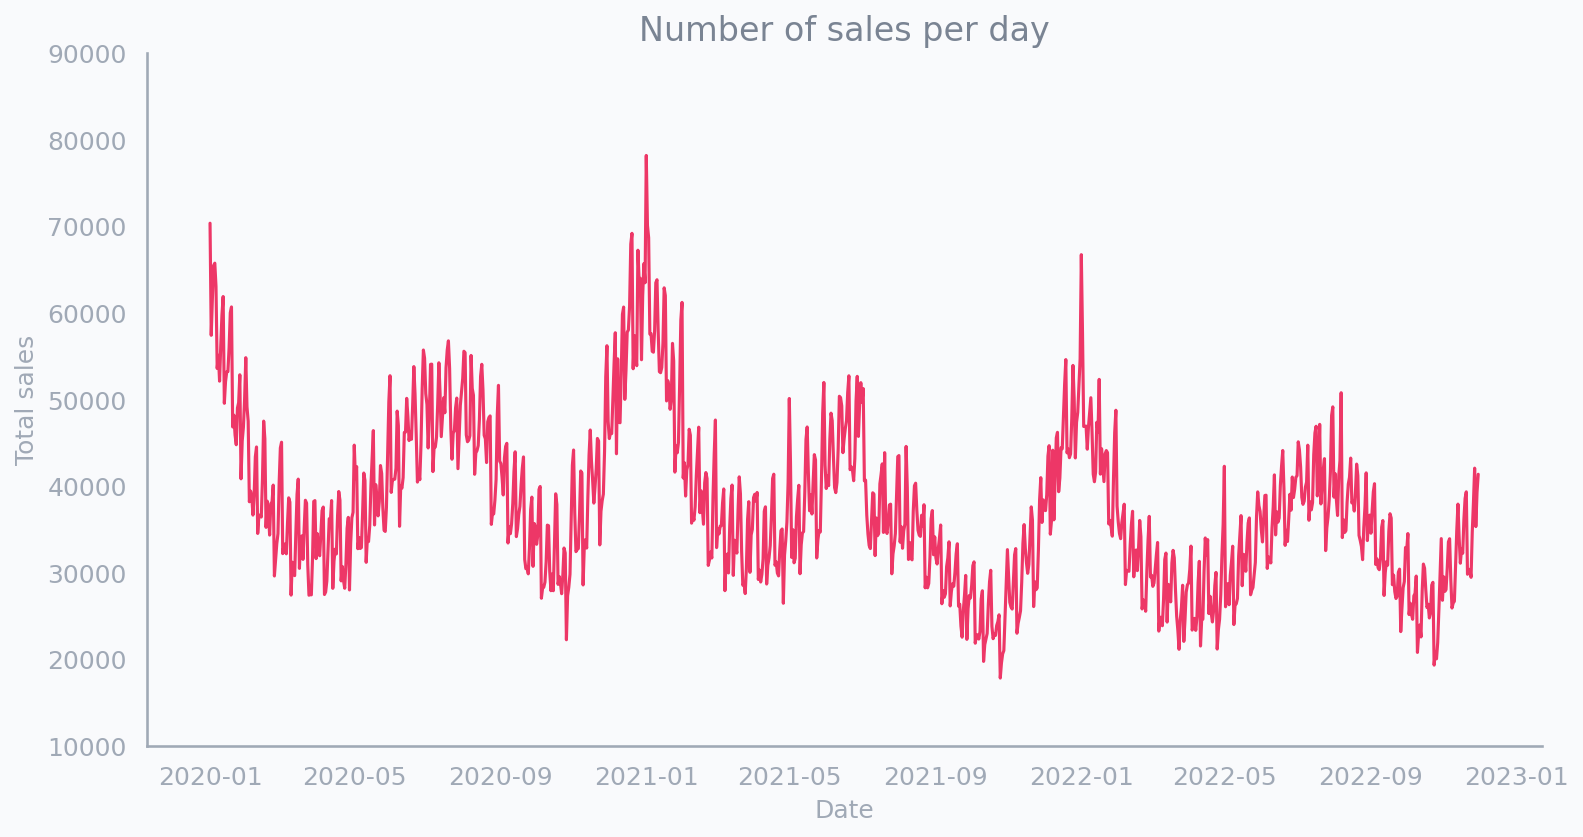

In [10]:
sales_per_day = df_demand.groupby("date")['demanda'].sum().to_frame().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_per_day, x="date", y="demanda", color=red)
plt.title("Number of sales per day")
plt.xlabel("Date")
plt.ylabel("Total sales")
plt.ylim(10_000, 90_000)
plt.show()

Some findings: 
- There are 135 different products in the table
- The date range is from January 1st, 2020 to November 30th, 2022.
- The average demand for products in a single day is 318.
- Looks like there's some seasonality both in total sales and the products sold.
- The sales volume have a negative trend.


### 🧺 Products

In [11]:
print('Shape:', df_products.shape)
df_products.head()

Shape: (135, 8)


,id_producto,categoria,subcategoria,tamaño,premium,marca_exclusiva,estacional,nit_proveedor
0,1,bebidas,Agua,Mediano,0.00,1,0,890900667.00
1,2,jabones,Antibacterial,Pequeño,NaN,0,0,890900667.00
2,3,bebidas,Gaseosa,Pequeño,0.00,1,0,890900667.00
3,4,congelados,Vegetales,Pequeño,0.00,1,1,890900667.00
4,5,shampoos,Acondicionador,Pequeño,0.00,1,0,890900667.00


In [12]:
# Check dtypes
df_products.dtypes

id_producto          int64
categoria           object
subcategoria        object
tamaño              object
premium            float64
marca_exclusiva      int64
estacional           int64
nit_proveedor      float64
dtype: object

In [13]:
# Check missing values 
df_products.isnull().sum()

id_producto         0
categoria           0
subcategoria       32
tamaño              3
premium             5
marca_exclusiva     0
estacional          0
nit_proveedor       1
dtype: int64

In [14]:
df_products.premium.value_counts()

premium
0.00    120
1.00     10
Name: count, dtype: int64

In [15]:
# Let's assume nulls are false 
df_products.premium.fillna(0, inplace=True)

In [16]:
# Convert dychothomous columns to boolean
df_products.premium = df_products.premium.astype(bool)
df_products.marca_exclusiva = df_products.marca_exclusiva.astype(bool)
df_products.estacional = df_products.estacional.astype(bool)

# Convert categorical columns to string
df_products.id_producto = df_products.id_producto.astype(str)
df_products.nit_proveedor = df_products.nit_proveedor.astype(str)

In [21]:
# Convert to lower case
for col in df_products.select_dtypes(include=['object']):
    df_products[col] = df_products[col].str.lower()

Now we check missing values

In [43]:
df_products.isna().sum()

id_producto         0
categoria           0
subcategoria       32
tamaño              3
premium             0
marca_exclusiva     0
estacional          0
nit_proveedor       0
dtype: int64

In [44]:
# Count null per group
df_products.groupby('categoria').agg(lambda x: x.isna().sum())

,id_producto,subcategoria,tamaño,premium,marca_exclusiva,estacional,nit_proveedor
categoria,,,,,,,
aseo,0,1,0,0,0,0,0
bebidas,0,3,1,0,0,0,0
carnes_y_aves,0,1,1,0,0,0,0
cereales_y_productos_secos,0,0,0,0,0,0,0
congelados,0,1,0,0,0,0,0
frutas_y_verduras,0,1,0,0,0,0,0
jabones,0,0,0,0,0,0,0
panaderia_y_panificados,0,1,0,0,0,0,0
productos_enlatados_y_alimentos_envasados,0,21,0,0,0,0,0


In [45]:
df_products.tamaño.value_counts()

tamaño
pequeño    105
mediano     20
grande       7
Name: count, dtype: int64

To fill the missing values for `subcategoria`, I'll assumme the product itself doesn't have a predefined subcategory yet so I will impute the subcategory with "indefinido". 

For the `tamaño` column, since we have only 3 nulls, I will use the most frequent label, which is "pequeño".

In [46]:
df_products['subcategoria'].fillna("indefinido", inplace=True)
df_products['tamaño'].fillna("pequeño", inplace=True)

We can describe the dataframe.

In [47]:
df_products.describe(include='all')

,id_producto,categoria,subcategoria,tamaño,premium,marca_exclusiva,estacional,nit_proveedor
count,135,135,135,135,135,135,135,135
unique,135,11,30,3,2,2,2,2
top,1,bebidas,indefinido,pequeño,False,True,False,890900667.0
freq,1,39,32,108,125,76,122,134


In [50]:
df_products.nit_proveedor.value_counts()

nit_proveedor
890900667.0    134
nan              1
Name: count, dtype: int64

We see that there are 134 different products from a single provider. Therefore, we can drop this column since won't give any information to our model.


⁂


Now let's give a look to the distribution of products

In [39]:
bool_cols = df_products.select_dtypes(bool).columns
df_bool_counts = df_products.groupby(['categoria', 'subcategoria'])[bool_cols].sum()
df_bool_counts.join(df_products.groupby(['categoria', 'subcategoria']).size().to_frame().rename(columns={0: 'total'}))

premium  marca_exclusiva  \
categoria                  subcategoria                                      
aseo                       cuidado personal             1                2   
                           limpieza general             0                1   
bebidas                    agua                         0                4   
                           cerveza internacional        0                2   
                           cerveza nacional             0                0   
                           gaseosa                      2                5   
                           licor nacional               0                2   
                           vinos                        0                4   
carnes_y_aves              cerdo                        1                1   
                           pavo                         0                1   
                           pollo                        0                3   
                           res                          1                3   
cereales_y_productos_secos arroz                        0                3   
                           frutos secos                 0                1   
                           legumbres                    0                3   
                           pasta                        0                1   
congelados                 helados                      0                0   
                           vegetales                    0                2   
frutas_y_verduras          enlatadas                    0                2   
                           frescas                      0                1   
jabones                    antibacterial                0                0   
panaderia_y_panificados    integral                     0                0   
                           otros                        0                1   
productos_lacteos          crema                        0                1   
                           leche                        0                4   
                           queso                        1                2   
                           yogur                        0                1   
shampoos                   acondicionador               0                3   
                           hidratante                   0                3   

                                                  estacional  total  
categoria                  subcategoria                              
aseo                       cuidado personal                0      3  
                           limpieza general                0      1  
bebidas                    agua                            0      8  
                           cerveza internacional           1      4  
                           cerveza nacional                0      4  
                           gaseosa                         1      9  
                           licor nacional                  0      4  
                           vinos                           2      7  
carnes_y_aves              cerdo                           0      2  
                           pavo                            0      3  
                           pollo                           1      7  
                           res                             0      7  
cereales_y_productos_secos arroz                           1      4  
                           frutos secos                    0      2  
                           legumbres                       1      3  
                           pasta                           0      2  
congelados                 helados                         0      1  
                           vegetales                       2      2  
frutas_y_verduras          enlatadas                       0      2  
                           frescas                         0      1  
jabones                    antibacterial                   0      1  
panaderia_y_panificad

The products brands marked with seasonal includes: a international beer, a soda, two wines, a chicken, a rice, a legumes, two frozen vegetables, and one cream. All of those seem to be seasonal products related to food in festivities. We'll check later if they indeed have a seasonality behaviour.

Another hypothesis is that the products which are exclusive brands may be the ones more resilient to competition and the non-exclusive/non-premium may be more sensible to competitors' strategies like promotions and better pricing. 


But before testing these hypothesis, let's join both tables.

In [52]:
df_demand_pro = pd.merge(
    left=df_demand,
    right=df_products.drop(columns=['nit_proveedor']),
    how='left',
    on='id_producto'
)

df_demand_pro.columns = [
    'date', 'product_id', 'demand', 'category', 'subcategory', 'size', 
    'is_premium', 'is_exclusive', 'is_seasonal'
]

In [53]:
df_demand_pro.sample(7)

,date,product_id,demand,category,subcategory,size,is_premium,is_exclusive,is_seasonal
82745,2021-11-28,92,112,aseo,cuidado personal,pequeño,False,False,False
54468,2021-04-01,112,244,congelados,indefinido,grande,False,True,False
49647,2021-02-19,8,95,carnes_y_aves,res,pequeño,False,False,False
36116,2020-11-03,125,234,bebidas,licor nacional,pequeño,False,False,False
39675,2020-12-01,81,107,bebidas,agua,pequeño,False,False,False
109902,2022-07-14,27,242,productos_lacteos,queso,pequeño,False,False,False
4229,2020-02-03,32,226,shampoos,acondicionador,pequeño,False,False,False


In [59]:
# Apply the same processing to the test data
df_demand_test["date"] = pd.to_datetime(df_demand["date"])
df_demand_test["id_producto"] = df_demand["id_producto"].astype(str)

df_demand_test_pro = pd.merge(
    left=df_demand_test,
    right=df_products.drop(columns=['nit_proveedor']),
    how='left',
    on='id_producto'
)

df_demand_test_pro.columns = [
    'date', 'product_id', 'category', 'subcategory', 'size', 'is_premium', 
    'is_exclusive', 'is_seasonal'
]

In [60]:
df_demand_pro.to_csv("../data/processed/demand_products.csv", index=False)
df_demand_test_pro.to_csv("../data/processed/demand_products_test.csv", index=False)

## 🛟 Deep diving the time series

### 🎢 Seasonality

### 💸 Competition impact

### 📉 Trend